# Model Interpretation

## Regression Models - On Boston Houses Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Boston.csv')
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
506     23.0  396.00  12.00  12.0  
507     23.0  343.00  25.00  32.0  
508     23.0  343.00  21.00  54.0  
509     23.0  343.00  76.00  67.0  
510     23.0  321.00  45.00  24.0  

[511 rows x 14 columns]

<br><br>

### Short Data Analysis

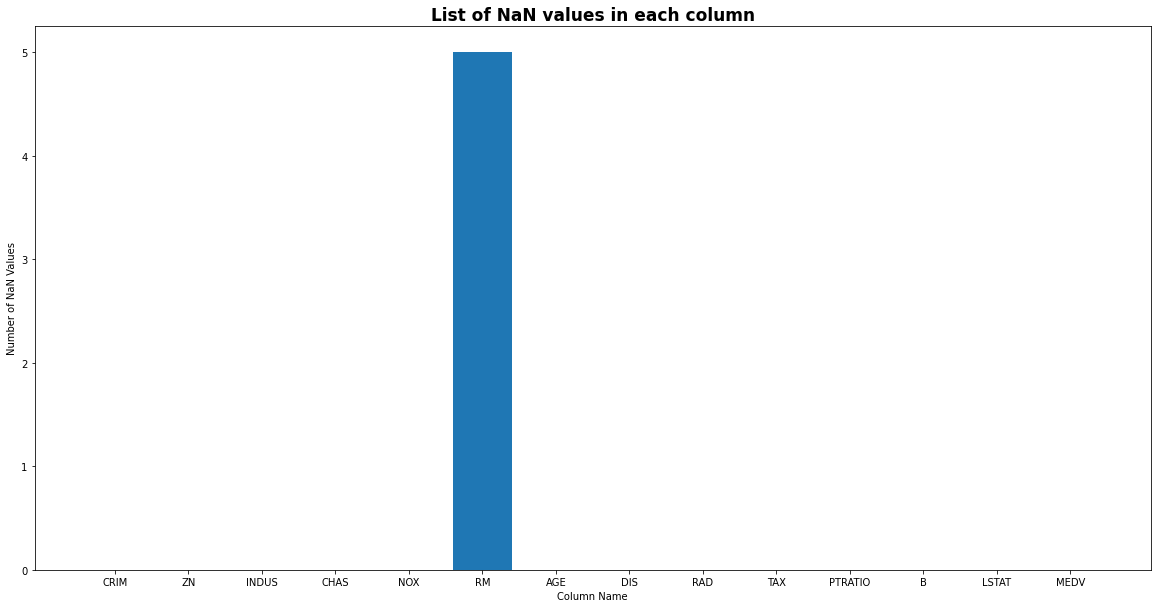

In [3]:
plt.figure(figsize=(20,10))
plt.bar(df.isnull().sum().index.values, df.isnull().sum())
plt.title('List of NaN values in each column', fontweight='bold', size = 17)
plt.ylabel('Number of NaN Values')
plt.xlabel('Column Name')
plt.show()

In [4]:
df.RM.fillna(df.RM.mean(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
df.describe().iloc[1:]

CRIM          ZN      INDUS      CHAS       NOX        RM  \
mean   3.584139   11.252446  11.151096  0.068493  0.554757  6.287589   
std    8.564433   23.234838   6.828175  0.252838  0.115310  0.700343   
min    0.006320    0.000000   0.460000  0.000000  0.385000  3.561000   
25%    0.082325    0.000000   5.190000  0.000000  0.449000  5.887500   
50%    0.261690    0.000000   9.690000  0.000000  0.538000  6.211000   
75%    3.621175   12.500000  18.100000  0.000000  0.624000  6.627000   
max   88.976200  100.000000  27.740000  1.000000  0.871000  8.780000   

             AGE        DIS        RAD         TAX    PTRATIO           B  \
mean   68.616243   3.783876   9.485323  407.440313  18.500000  356.600900   
std    28.099130   2.098631   8.688469  167.903532   2.200348   90.882679   
min     2.900000   1.129600   1.000000  187.000000  12.600000    0.320000   
25%    45.050000   2.100350   4.000000  279.500000  17.400000  374.710000   
50%    77.300000   3.152300   5.000000  330.000000  19.100000  391.340000   
75%    94.050000   5.118000  24.000000  666.000000  20.200000  396.210000   
max   100.000000  12.126500  24.000000  711.000000  23.000000  396.900000   

          LSTAT       MEDV  
mean  12.879550  22.682192  
std    7.797416   9.484262  
min    1.730000   5.000000  
25%    7.065000  17.050000  
50%   11.450000  21.200000  
75%   17.105000  25.000000  
max   76.000000  67.000000

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [9]:
pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1]).describe().iloc[1:]

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
mean  0.040214  0.112524  0.391902  0.068493  0.349294  0.522435  0.676789   
std   0.096262  0.232348  0.250300  0.252838  0.237263  0.134191  0.289383   
min   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25%   0.000854  0.000000  0.173387  0.000000  0.131687  0.445775  0.434089   
50%   0.002870  0.000000  0.338343  0.000000  0.314815  0.507760  0.766220   
75%   0.040630  0.125000  0.646628  0.000000  0.491770  0.587469  0.938723   
max   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

           DIS       RAD       TAX   PTRATIO         B     LSTAT  
mean  0.241366  0.368927  0.420688  0.567308  0.898383  0.150122  
std   0.190838  0.377760  0.320427  0.211572  0.229166  0.104987  
min   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
25%   0.088275  0.130435  0.176527  0.461538  0.944047  0.071833  
50%   0.183934  0.173913  0.272901  0.625000  0.985980  0.130874  
75%   0.362684  1.000000  0.914122  0.730769  0.998260  0.207015  
max   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

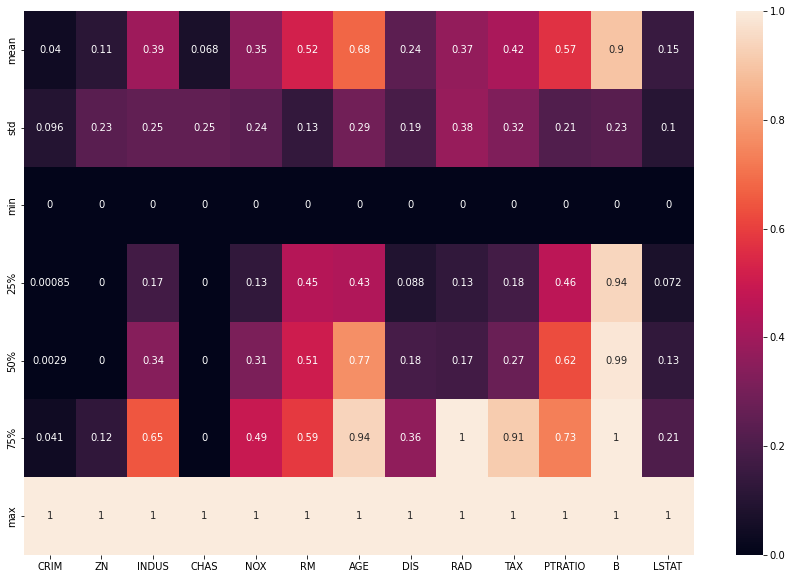

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1]).describe().iloc[1:], vmin=0, vmax=1, annot=True)
plt.show()

<br><br>

### Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [12]:
linear_regression.fit(X, y)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Sqarred Error :',mean_squared_error(linear_regression.predict(X), y))
print('Mean Absolute Error :',mean_absolute_error(linear_regression.predict(X), y))

Mean Sqarred Error : 33.63202060886746
Mean Absolute Error : 3.6095226161541807


#### Relation between model coeficients and columns-target correlation

In [14]:
df.corr()[df.columns[-1]][:-1]

CRIM      -0.380072
ZN         0.339767
INDUS     -0.463269
CHAS       0.164782
NOX       -0.411486
RM         0.666954
AGE       -0.368203
DIS        0.233469
RAD       -0.379016
TAX       -0.459274
PTRATIO   -0.447464
B          0.317941
LSTAT     -0.562960
Name: MEDV, dtype: float64

Text(0.5, 1.0, 'Columns Correlation')

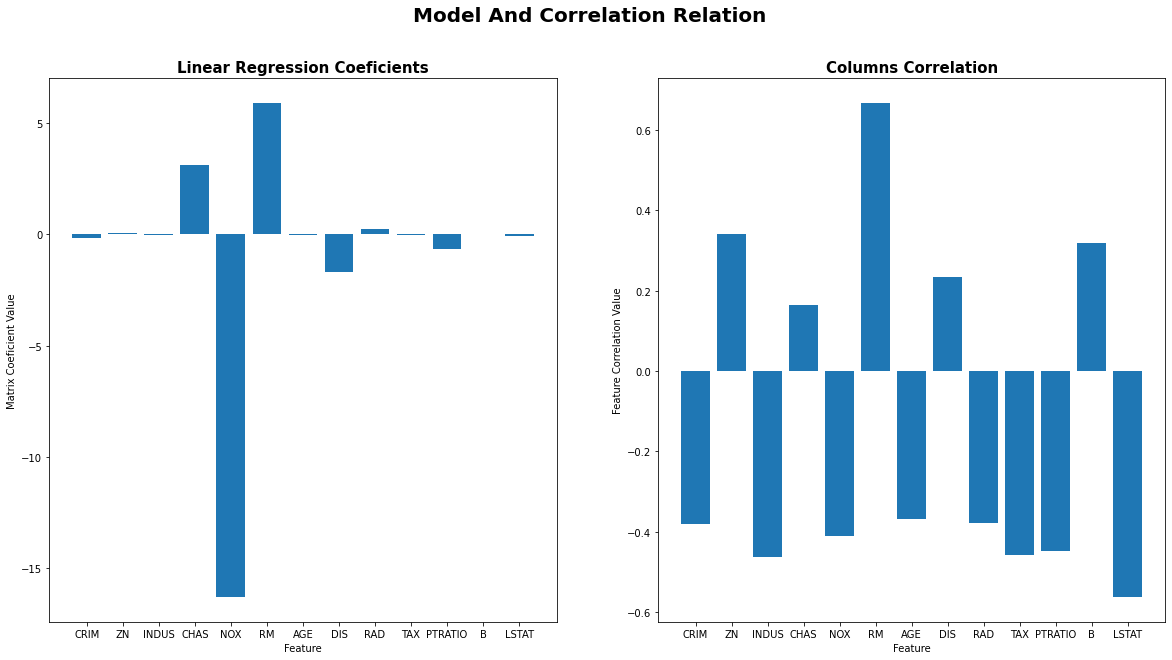

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Model And Correlation Relation', fontweight='bold', size = 20)

ax1.bar(df.columns[:-1], linear_regression.coef_)
ax1.set_ylabel('Matrix Coeficient Value')
ax1.set_xlabel('Feature')
ax1.set_title('Linear Regression Coeficients', fontweight='bold', size = 15)

ax2.bar(df.corr()[df.columns[-1]].index.values[:-1], df.corr()[df.columns[-1]].values[:-1])
ax2.set_ylabel('Feature Correlation Value')
ax2.set_xlabel('Feature')
ax2.set_title('Columns Correlation', fontweight='bold', size = 15)

Text(0.5, 1.0, 'Columns Correlation')

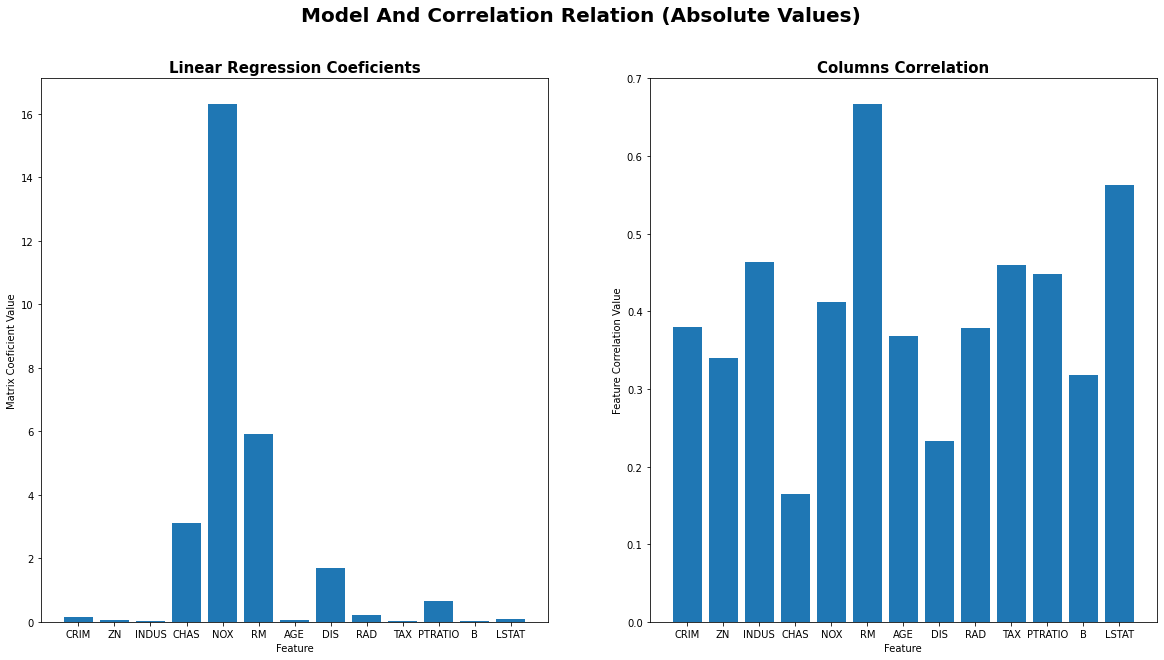

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Model And Correlation Relation (Absolute Values)', fontweight='bold', size = 20)

ax1.bar(df.columns[:-1], np.abs(linear_regression.coef_))
ax1.set_ylabel('Matrix Coeficient Value')
ax1.set_xlabel('Feature')
ax1.set_title('Linear Regression Coeficients', fontweight='bold', size = 15)

ax2.bar(df.corr()[df.columns[-1]].index.values[:-1], np.abs(df.corr()[df.columns[-1]].values[:-1]))
ax2.set_ylabel('Feature Correlation Value')
ax2.set_xlabel('Feature')
ax2.set_title('Columns Correlation', fontweight='bold', size = 15)

#### Visualisation of the model and data repartition

<Figure size 720x720 with 0 Axes>

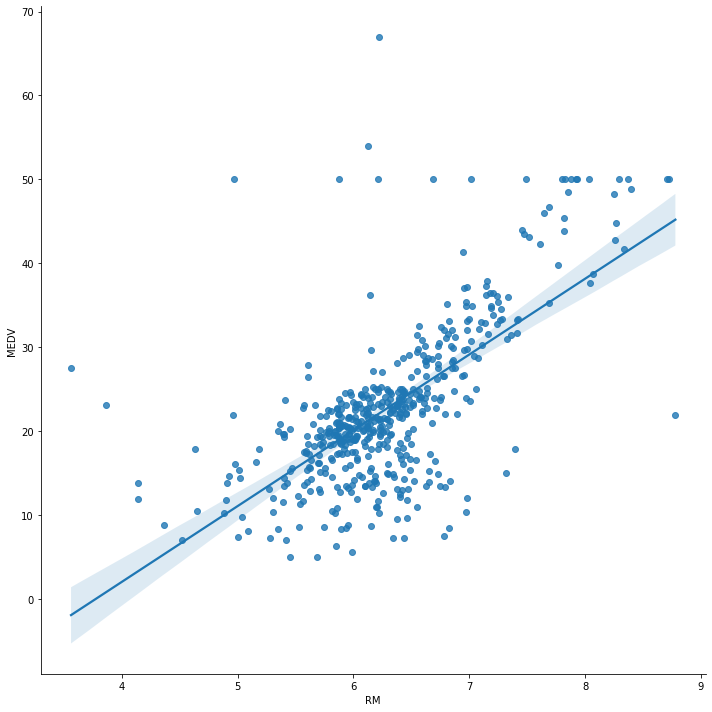

In [17]:
plt.figure(figsize = (10,10))
sns.lmplot(x='RM', y = 'MEDV', data=df, height = 10)
plt.show()

#### Linear relation between target and predicted values

<Figure size 720x720 with 0 Axes>

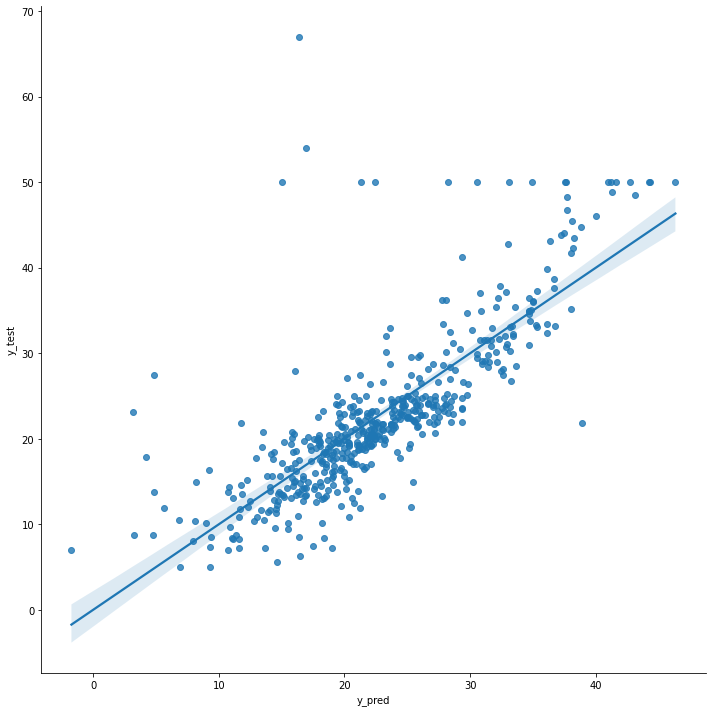

In [18]:
prediction = pd.DataFrame({'y_pred':linear_regression.predict(df[df.columns[:-1]].values), 'y_test':df.MEDV.values})

plt.figure(figsize = (10,10))
sns.lmplot(x='y_pred', y = 'y_test', data=prediction, height = 10)
plt.show()

#### Lime Model Interpretation

In [19]:
from lime import lime_tabular

In [20]:
explainer = lime_tabular.LimeTabularExplainer(X, 
                                              feature_names= df.columns[:-1],
                                              class_names= df.columns[-1],
                                              verbose=True, 
                                              mode='regression',
                                              discretize_continuous=False)

In [21]:
exp = explainer.explain_instance(X[0], linear_regression.predict)

Intercept 22.7108391962829
Prediction_local [27.83539873]
Right: 28.031300967517076


In [22]:
exp.show_in_notebook(show_table=True, show_all = False)

<br><br>

### Decision Tree Regressor Model

In [23]:
from dtreeviz.trees import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

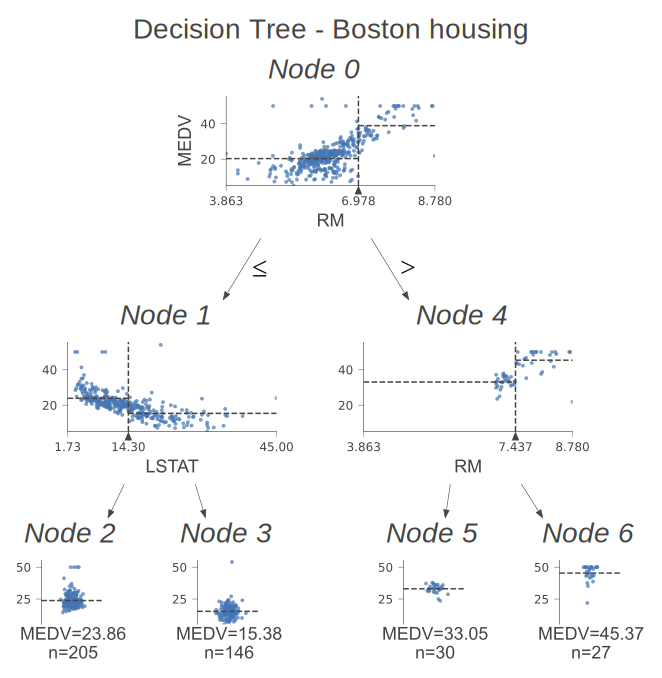

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fir the regressor
reg = DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='MEDV',
               feature_names=df.columns[:-1],
               title="Decision Tree - Boston housing",
               show_node_labels = True,
               scale=2)
viz

#### Lime Model Interpretation

In [25]:
explainer = lime_tabular.LimeTabularExplainer(X_train, 
                                              feature_names= df.columns[:-1],
                                              class_names= df.columns[-1],
                                              verbose=True, 
                                              mode='regression',
                                              discretize_continuous=False)

In [26]:
exp = explainer.explain_instance(X[0], reg.predict)

Intercept 22.821675039589806
Prediction_local [27.50684015]
Right: 23.858048780487817


In [27]:
exp.show_in_notebook(show_table=True, show_all = False)

### Shap Model Interpretation

In [28]:
import shap

shap.initjs()

In [29]:
explainer = shap.Explainer(reg.predict, X_train, feature_names=df.columns[:-1])

In [30]:
shap_values = explainer(X_test)

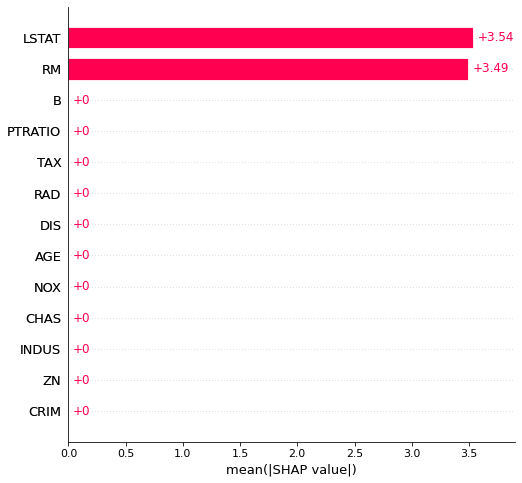

In [31]:
shap.plots.bar(shap_values, max_display= 20)

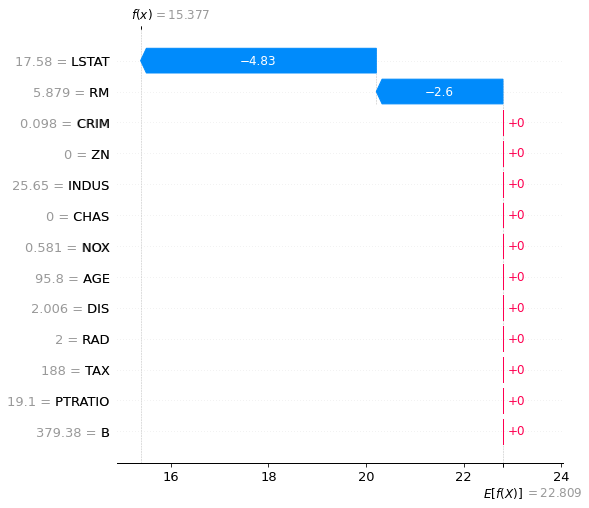

In [32]:
shap.plots.waterfall(shap_values[0], max_display=20)

In [33]:
shap.plots.beeswarm(shap_values, max_display=20)

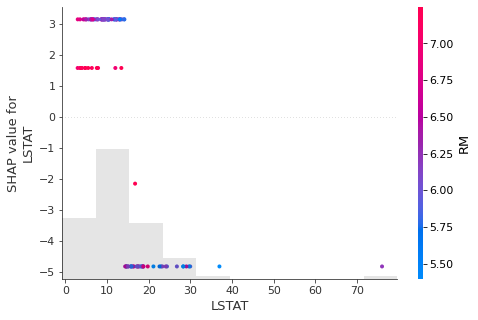

In [34]:
shap.plots.scatter(shap_values[:,"LSTAT"], color=shap_values)

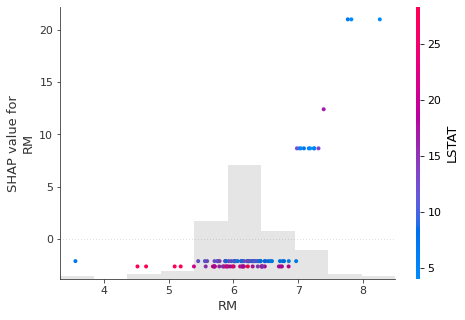

In [35]:
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

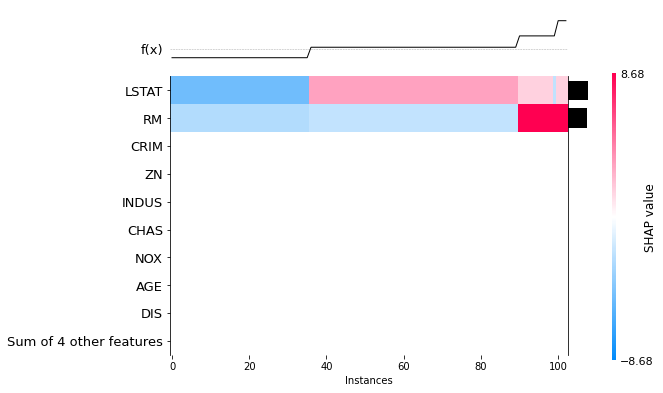

In [36]:
shap.plots.heatmap(shap_values)

<br><br>

## Classifier Models - On Churn Dataset

In [37]:
df = pd.read_csv('Data/Churn.csv', index_col= 0)
df

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0                 0        1           0       1             0              1   
1                 0        0           0      34             1              0   
2                 0        0           0       2             1              0   
3                 0        0           0      45             0              1   
4                 0        0           0       2             1              0   
...             ...      ...         ...     ...           ...            ...   
7038              0        1           1      24             1              2   
7039              0        1           1      72             1              2   
7040              0        1           1      11             0              1   
7041              1        1           0       4             1              2   
7042              0        0           0      66             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  Churn  
0                 2           29.85      0  
1                 3           56.95      0  
2                 3           53.85      1  
3                 0           42.30      0  
4                 2           70.70      1  
...             ...             ...    ...  
7038              3           84.80      0  
7039              1          103.20      0  
7040              2           29.60      0  
7041              3           74.40      1  
7042              0          105.65      0  

[7043 rows x 18 columns]

<br><br>

### Short Data Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


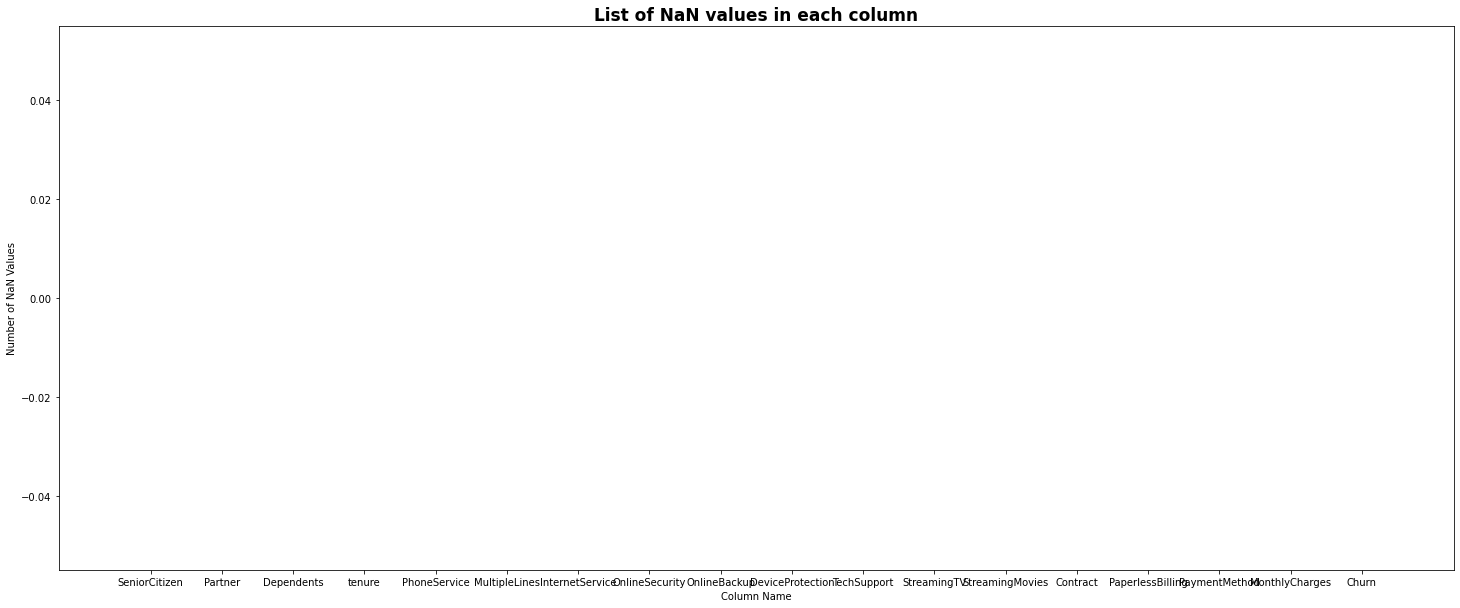

In [39]:
plt.figure(figsize=(25,10))
plt.bar(df.isnull().sum().index.values, df.isnull().sum())
plt.title('List of NaN values in each column', fontweight='bold', size = 17)
plt.ylabel('Number of NaN Values')
plt.xlabel('Column Name')
plt.show()

<br><br>

### Decision Tree Classifier Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### Feature relation represented using the Decision Tree Classifier Model

In [42]:
viz = dtreeviz(clf, x_data=df[df.columns[:-1]], 
               y_data= y, 
               feature_names = df.columns[:-1] , 
               target_name='Churn', 
               class_names= ['Not Churn', 'Churn'], 
               title='Decision Tree - Churn Model Visualisation', 
               scale = 2,
              show_node_labels=True)
viz

#### Accuracy Score, Recall Score and Confusion Matrix

Accuracy Score : 0.7814052519517388
Recall Score : 0.631578947368421

Confusion Matrix


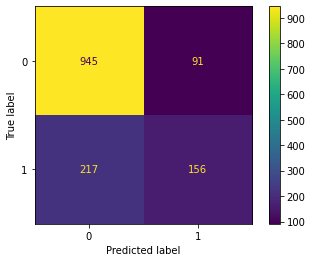

In [43]:
from sklearn.metrics import recall_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score, PrecisionRecallDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
print('Accuracy Score :', accuracy_score(clf.predict(X_test), y_test))
print('Recall Score :', recall_score(clf.predict(X_test), y_test))
print('\nConfusion Matrix')

In [44]:
precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))

plt.figure(figsize=(10,10))

plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')

plt.legend()

plt.show()

In [45]:
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

#### Roc and Det Curve

In [46]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Model And Correlation Relation (Absolute Values)', fontweight='bold', size = 20)

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
ax1.set_title('Roc Curve', fontweight='bold', size = 15)

DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
ax2.set_title('Det Curve', fontweight='bold', size = 15)

Text(0.5, 1.0, 'Det Curve')

#### Shap Model Interpretation

In [48]:
explainer = shap.Explainer(clf.predict, X_train, feature_names=df.columns[:-1])

In [49]:
shap_values = explainer(X_test)

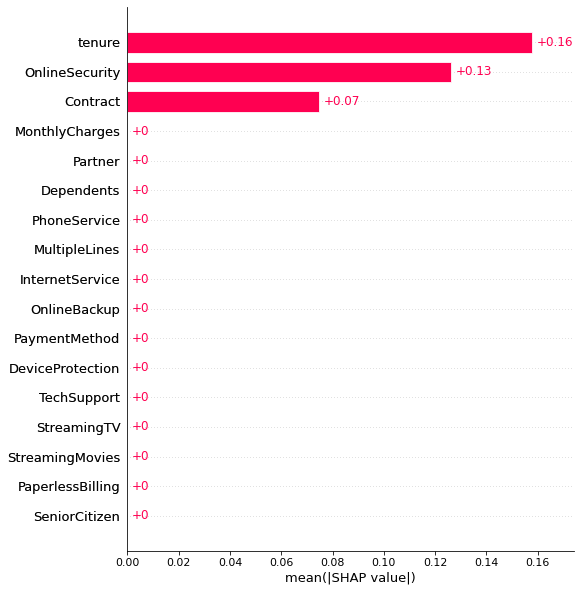

In [50]:
shap.plots.bar(shap_values, max_display= 20)

In [51]:
shap.plots.waterfall(shap_values[0], max_display=20)

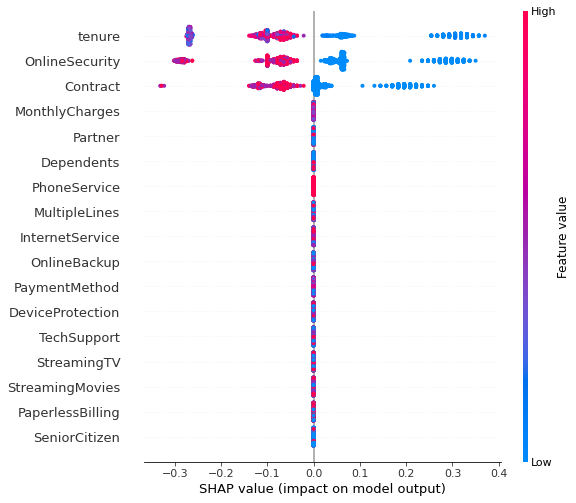

In [52]:
shap.plots.beeswarm(shap_values, max_display=20)

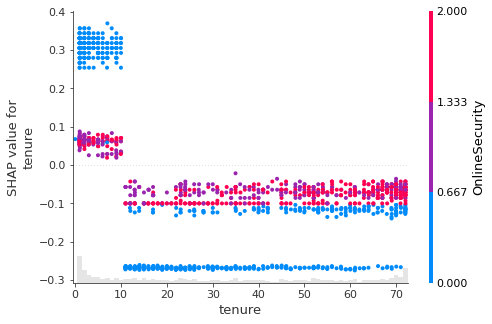

In [53]:
shap.plots.scatter(shap_values[:,"tenure"], color=shap_values)

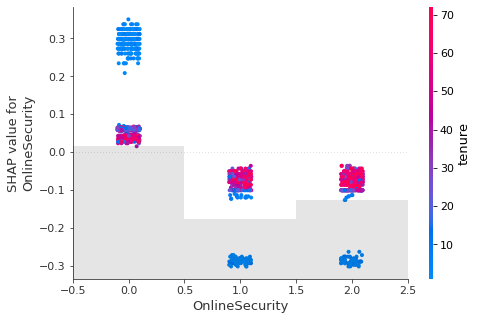

In [54]:
shap.plots.scatter(shap_values[:,"OnlineSecurity"], color=shap_values)

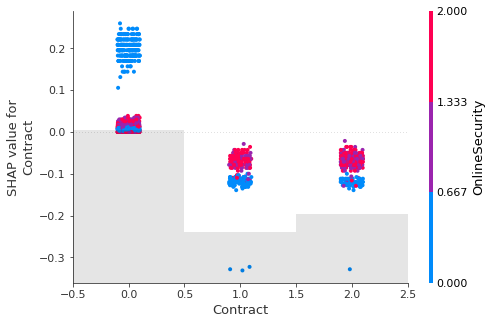

In [55]:
shap.plots.scatter(shap_values[:,"Contract"], color=shap_values)

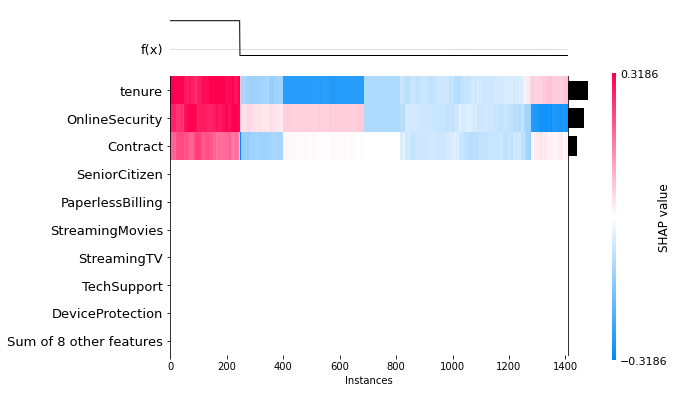

In [56]:
shap.plots.heatmap(shap_values)

<br><br>

### Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

In [58]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Accuracy Score, Recall Score, Confusion Matrix

In [59]:
ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test)
print('Accuracy Score :', accuracy_score(logistic_regression.predict(X_test), y_test))
print('Recall Score :', recall_score(logistic_regression.predict(X_test), y_test))
print('\nConfusion Matrix')

Accuracy Score : 0.8176011355571328
Recall Score : 0.68125

Confusion Matrix


In [60]:
precision, recall, _ = precision_recall_curve(y_test, logistic_regression.predict(X_test))

plt.figure(figsize=(10,10))

plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')

plt.legend()

plt.show()

#### Roc and Det Curve

Text(0.5, 1.0, 'Det Curve')

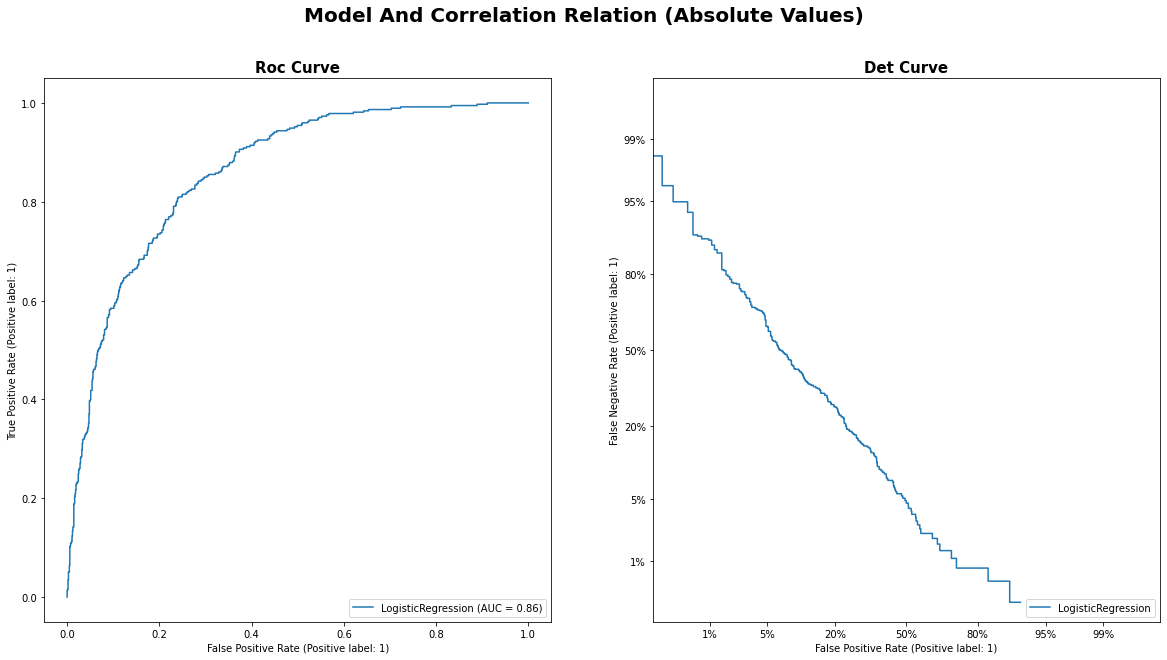

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Model And Correlation Relation (Absolute Values)', fontweight='bold', size = 20)

RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test, ax=ax1)
ax1.set_title('Roc Curve', fontweight='bold', size = 15)

DetCurveDisplay.from_estimator(logistic_regression, X_test, y_test, ax=ax2)
ax2.set_title('Det Curve', fontweight='bold', size = 15)

#### Relation between model coeficients and columns-target correlation

In [62]:
df.corr()[df.columns[-1]].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Columns Correlation')

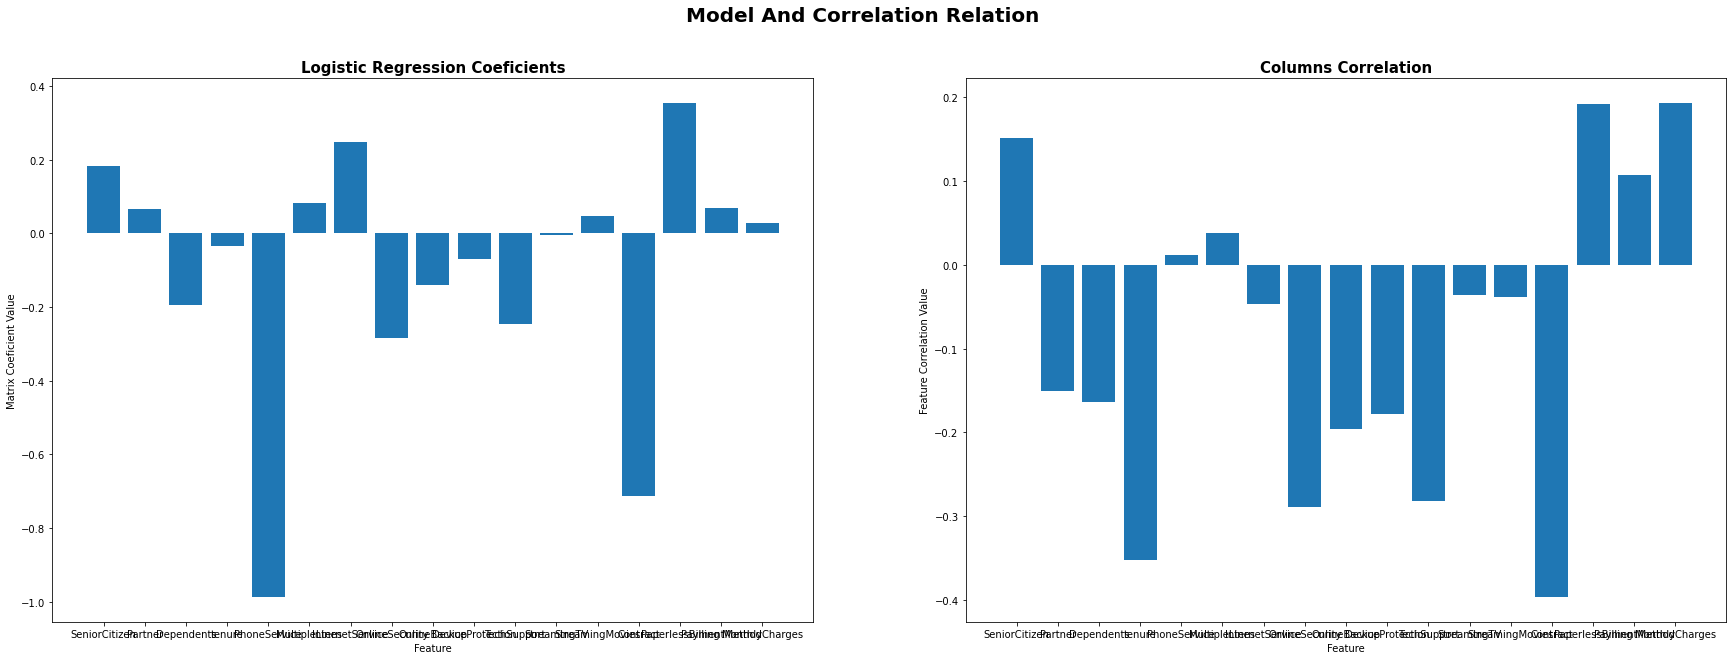

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Model And Correlation Relation', fontweight='bold', size = 20)

ax1.bar(df.columns[:-1], logistic_regression.coef_.reshape(-1))
ax1.set_ylabel('Matrix Coeficient Value')
ax1.set_xlabel('Feature')
ax1.set_title('Logistic Regression Coeficients', fontweight='bold', size = 15)

ax2.bar(df.corr()[df.columns[-1]].index.values[:-1], df.corr()[df.columns[-1]].values[:-1])
ax2.set_ylabel('Feature Correlation Value')
ax2.set_xlabel('Feature')
ax2.set_title('Columns Correlation', fontweight='bold', size = 15)

Text(0.5, 1.0, 'Columns Correlation')

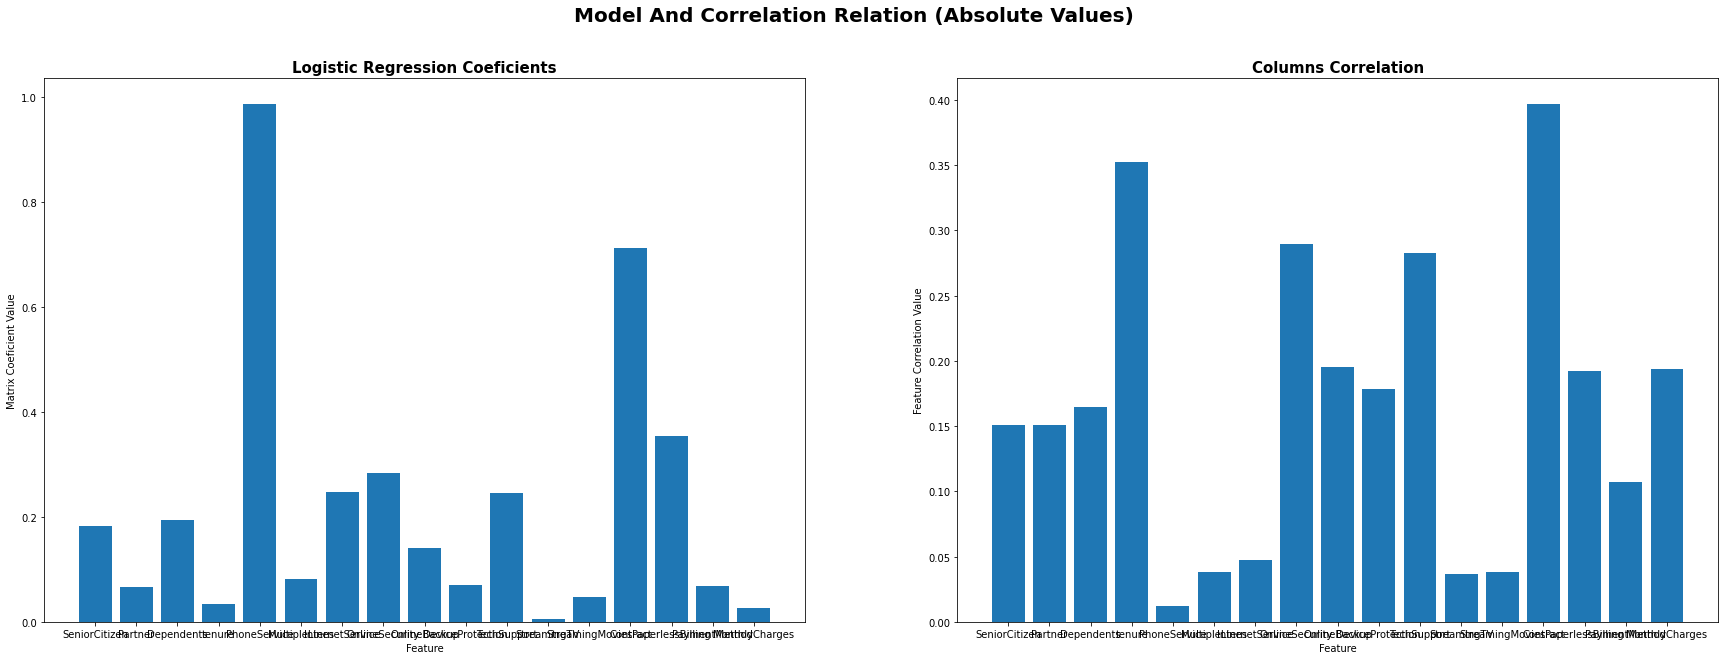

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Model And Correlation Relation (Absolute Values)', fontweight='bold', size = 20)

ax1.bar(df.columns[:-1], np.abs(logistic_regression.coef_.reshape(-1)))
ax1.set_ylabel('Matrix Coeficient Value')
ax1.set_xlabel('Feature')
ax1.set_title('Logistic Regression Coeficients', fontweight='bold', size = 15)

ax2.bar(df.corr()[df.columns[-1]].index.values[:-1], np.abs(df.corr()[df.columns[-1]].values[:-1]))
ax2.set_ylabel('Feature Correlation Value')
ax2.set_xlabel('Feature')
ax2.set_title('Columns Correlation', fontweight='bold', size = 15)

#### Shap Model Analysis

In [65]:
explainer = shap.Explainer(logistic_regression.predict, X_train, feature_names=df.columns[:-1])

In [66]:
shap_values = explainer(X_test)

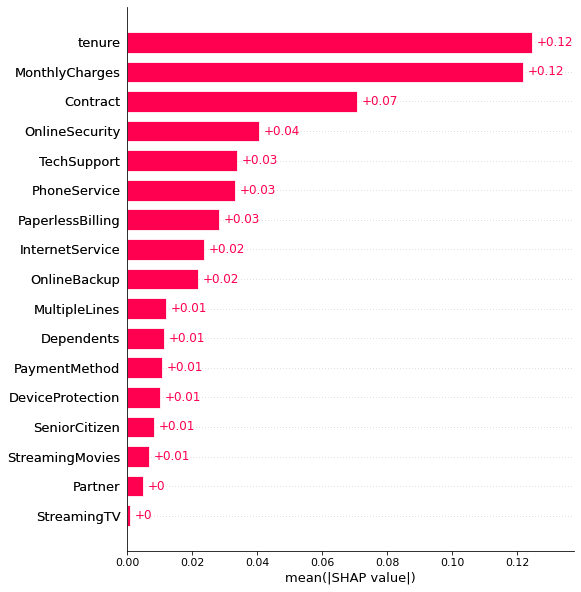

In [67]:
shap.plots.bar(shap_values, max_display= 20)

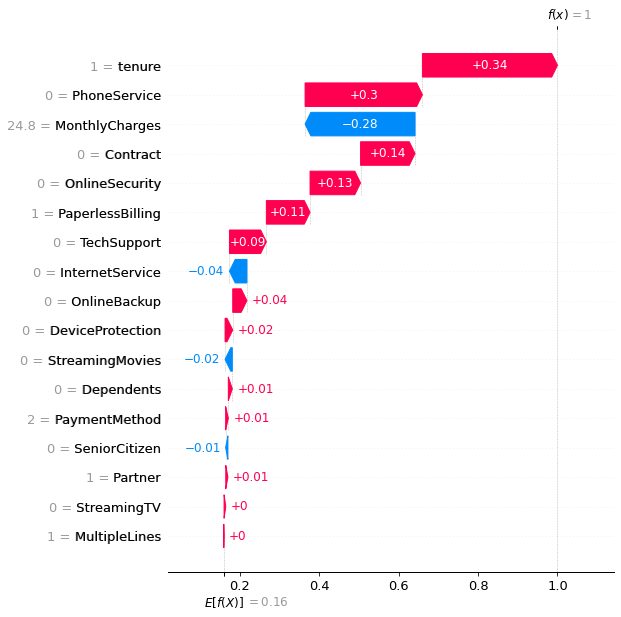

In [68]:
shap.plots.waterfall(shap_values[0], max_display=20)

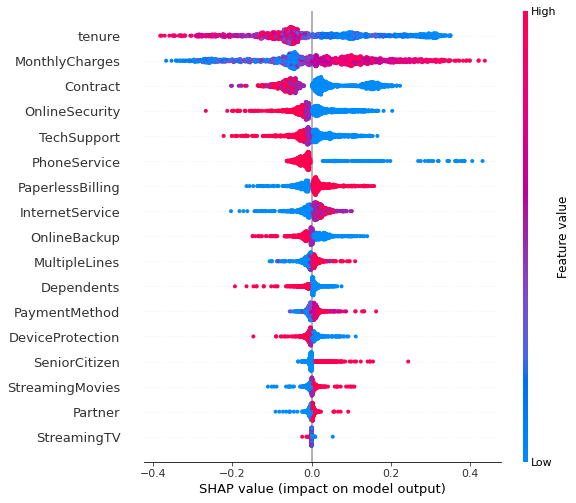

In [69]:
shap.plots.beeswarm(shap_values, max_display=20)

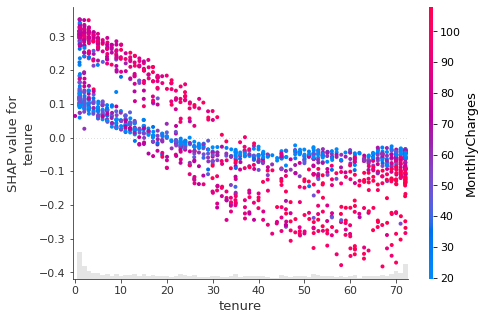

In [70]:
shap.plots.scatter(shap_values[:,"tenure"], color=shap_values)

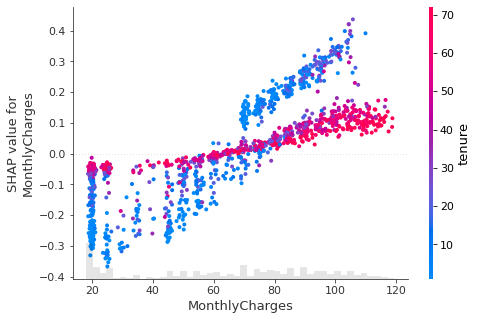

In [71]:
shap.plots.scatter(shap_values[:,"MonthlyCharges"], color=shap_values)

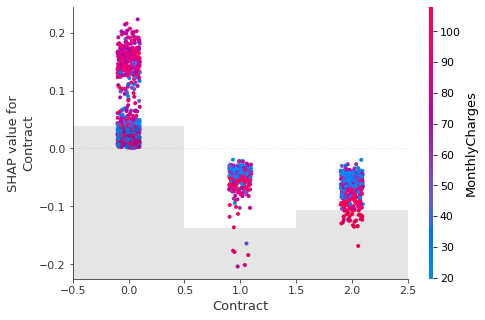

In [72]:
shap.plots.scatter(shap_values[:,"Contract"], color=shap_values)

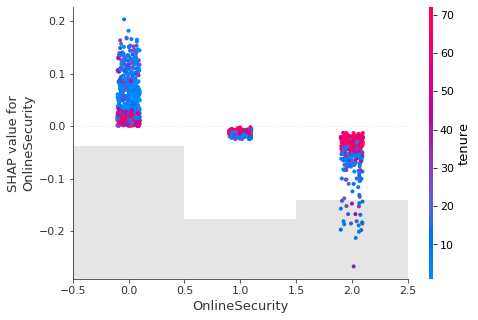

In [73]:
shap.plots.scatter(shap_values[:,"OnlineSecurity"], color=shap_values)

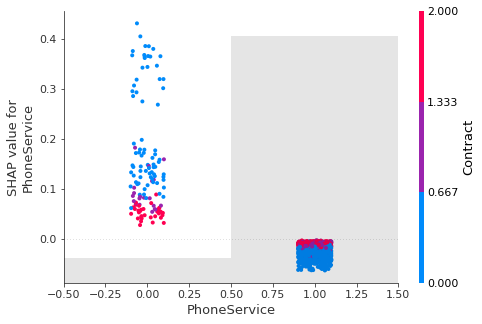

In [74]:
shap.plots.scatter(shap_values[:,"PhoneService"], color=shap_values)

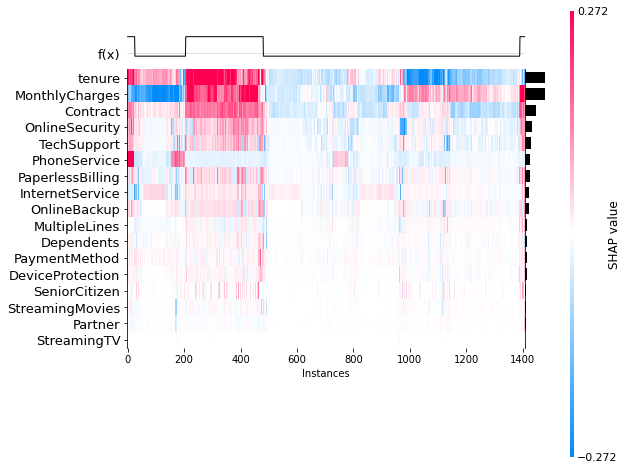

In [75]:
shap.plots.heatmap(shap_values, max_display=20)